# 用户指南
欢迎使用 ``pyquafu``! [Quafu](http://quafu.baqis.ac.cn/) 是一个向全球公众用户开放的超导量子（ScQ）计算资源共享平台。作为 [Quafu](http://quafu.baqis.ac.cn/) 的 python 扩展软件包，``pyquafu`` 不仅为实验后端提供了灵活先进的接口，而且为模拟或可视化量子计算提供了有用的工具包。本文档就是对 ``pyquafu`` 基本语法和用途的介绍。

## 安装
``pyquafu`` 要求 ``python3.8`` 及以上的版本。建议为其激活一个单独的虚拟环境，教程见 [quafu-tutorial-venv](https://github.com/ScQ-Cloud/quafu-tutorial/blob/main/python_skill/Use%20Python%20Virtual%20Environment.md)。

想要安装最新的稳定版本，请在终端或命令行中输入以下代码
```
pip install pyquafu 
```

## 设置您的 pyquafu 账号
如果您还未拥有 pyquafu 账号，可以在 [Quafu](http://quafu.baqis.ac.cn/) 网站上先注册一个。
然后可以在 ``Dashboard`` 页面上找到您的 API 令牌 `<your API token>`，这个令牌是您向 ScQ 芯片发送任务所必需的。

可以通过执行以下代码将您的令牌保存到本地设备。


In [1]:
from quafu import User
user = User("<your API token>")
user.save_apitoken()

当您执行完以上代码后，可以在实验后端查看您的可用 ScQ 芯片。

In [2]:
available_backends = user.get_available_backends()

system_name	 qubits	 status
ScQ-P10   	 10   	 Online
ScQ-P18   	 18   	 Online
ScQ-P136  	 136  	 Online


*注意*: 当您下次再使用 ``pyquafu`` 的时候,不必再次保存您的 API 令牌。尽管 quafu 的 API 令牌不是永久有效的,但您仍可以通过定期在 [Quafu](http://quafu.baqis.ac.cn/) 网页端点击 **``refresh``** 按钮来获取一个新的 API 令牌。

## 建立您的第一个量子线路

让我们从初始化一个5量子比特的电路开始。

In [30]:
import numpy as np
from quafu import QuantumCircuit

qc = QuantumCircuit(5)

### 应用各种门

``PyQuafu`` 用 '``qc.name(args)``' 语法格式来对线路添加各种门和进行其他操作。

In [4]:
qc.x(0) # 对第一个量子比特添加X门
qc.x(1) 
qc.cnot(2, 1)  # C-NOT门，旋转门和其他控制门
qc.ry(1, np.pi/2) 
qc.rx(2, np.pi) 
qc.rz(3, 0.1) 
qc.cz(2, 3) 

或者您也可以手动实例化一个门并将其添加到电路中。

In [5]:
# 和qc.x(0)等价的实例化门
import quafu.elements.element_gates as qeg
gate = qeg.XGate(pos=0)
qc.add_gate(gate)

这段代码的作用实际上跟 ``.name(args)`` 函数是一样的。 当您需要通过现有电路构建新电路时，您会发现第二种代码格式更为方便。

对于所有Quafu平台支持的量子门，可以在 [`QuantumCircuit`](apiref/#quafu.QuantumCircuit) 的 API 参考中查阅或者使用 python 内置的 ``dir()`` 方法来获取。

In [6]:
print(dir(qc))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_used_qubits', 'add_gate', 'add_pulse', 'barrier', 'circuit', 'cnot', 'cp', 'cs', 'ct', 'cx', 'cy', 'cz', 'delay', 'draw_circuit', 'fredkin', 'from_openqasm', 'gates', 'h', 'id', 'iswap', 'layered_circuit', 'mcx', 'mcy', 'mcz', 'measure', 'measures', 'num', 'openqasm', 'p', 'plot_circuit', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzz', 's', 'sdg', 'sw', 'swap', 'sx', 'sxdg', 'sy', 'sydg', 't', 'tdg', 'to_openqasm', 'toffoli', 'unitary', 'used_qubits', 'w', 'x', 'xy', 'y', 'z']


### 测量

添加对测量的说明，包括：测量的量子位 (`measures`) 和保存测量结果的经典位 (`cbits`) 。如果没有任何说明，则自动测量所有的比特。

In [7]:
measures = [0, 1, 2, 3, 4]
cbits = [0, 1, 2, 4, 3]
qc.measure(measures,  cbits=cbits)
qc.measures

{0: 0, 1: 1, 2: 2, 3: 4, 4: 3}

### 可视化

从 ``0.3.2`` 版本起，``pyquafu`` 就提供两种相似的方式来可视化量子线路。您可以使用 [`draw_circuit`](apiref/#quafu.circuits.quantum_circuit.QuantumCircuit.draw_circuit) 方法并使用 `width` 参数来调整线路中操作与操作之间的间距。

In [8]:
qc.draw_circuit(width=4)

q[0]  ------X--------X-------------------- M->c[0]
                                          
q[1]  ------X--------+----RY(1.571)------- M->c[1]
                     |                    
q[2]  ---------------*----RX(3.142)----*-- M->c[2]
                                       |  
q[3]  --RZ(0.100)----------------------Z-- M->c[4]
                                          
q[4]  ------------------------------------ M->c[3]


或者，您可以使用 ``plot_circuit`` 方法来绘制更美观的量子线路图。

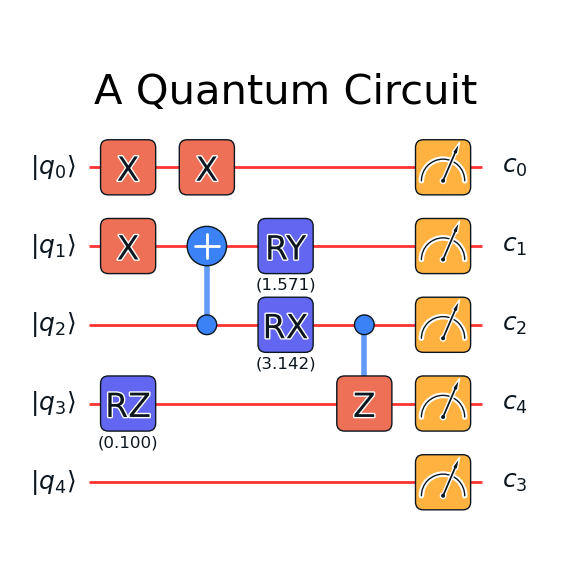

In [9]:
qc.plot_circuit(title='A Quantum Circuit')

第二种可视化方法基于 ``matplotlib`` 包，您可以将图片保存成任意 ``matplotlib`` 支持的文件格式。

### 开放量子汇编语言(QASM)支持

``pyquafu`` 与 [OPENQASM2.0](https://arxiv.org/abs/1707.03429) 中的量子门向后兼容。您可以将量子电路储存为 ``openqasm`` 字符串，或者用 ``openqasm`` 文本来初始化。

In [10]:
qasm = qc.to_openqasm()
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg meas[5];
x q[0];
x q[1];
cx q[2],q[1];
ry(1.5707963267948966) q[1];
rx(3.141592653589793) q[2];
rz(0.1) q[3];
cz q[2],q[3];
x q[0];
measure q[0] -> meas[0];
measure q[1] -> meas[1];
measure q[2] -> meas[2];
measure q[3] -> meas[4];
measure q[4] -> meas[3];



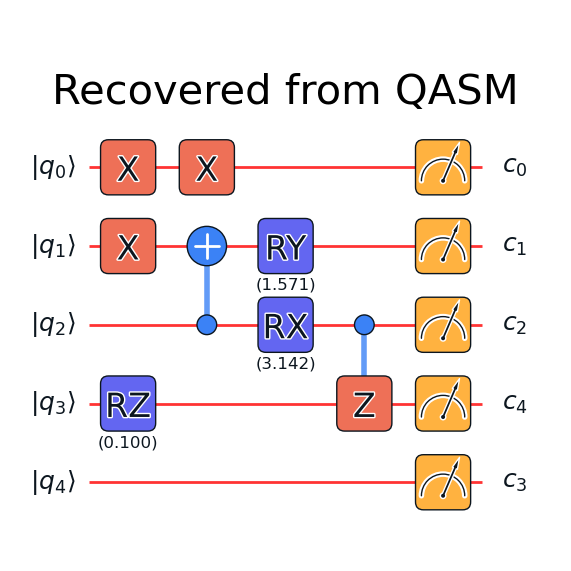

In [16]:
del qc
qc = QuantumCircuit(5)
qc.from_openqasm(qasm)
qc.plot_circuit('Recovered from QASM')

## 执行和模拟
现在您已经准备好向实验后端提交一个量子线路了，首先让我们初始化一个任务对象。

In [17]:
from quafu import Task
task = Task()

您可以使用 [`config`](apiref/#quafu.tasks.tasks.Task.config) 方法来配置任务属性。这里我们选择后端 (`backend`) 为 `ScQ-P18`，单次执行次数 (`shots`) 为 2000 并在后端编译 (`compile`) 该任务。

In [21]:
task.config(backend="ScQ-P18", shots=2000, compile=True)

如果将 `compile` 参数设置为 `False`，那么请您了解线路的拓扑结构并向后端提交可以有效执行的电路。

将量子电路发送到实验后端并等待任务结果。

In [22]:
res = task.send(qc, wait=True)

您可以使用返回的结果来检查每个比特测量基的计数和概率。默认情况下，输出位按 **big-endian** 规则来排列，可以参阅<a href="#a_subtle_detail">下一节</a>

OrderedDict([('00100', 717), ('00110', 31), ('01000', 6), ('01100', 1185), ('01110', 39), ('10100', 22)])
{'00100': 0.3585, '00110': 0.0155, '01000': 0.003, '01100': 0.5925, '01110': 0.0195, '10100': 0.011}


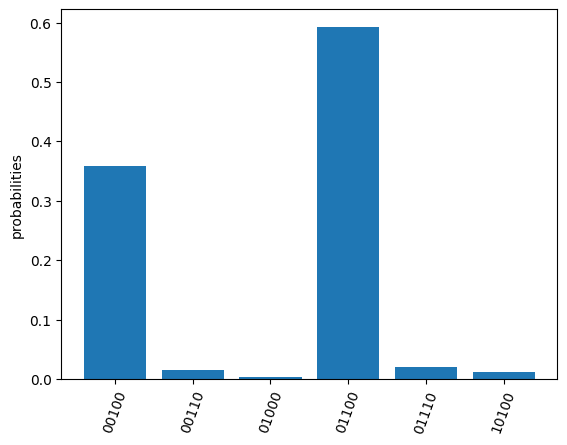

In [50]:
print(res.counts) # 计数
print(res.probabilities) # 概率
res.plot_probabilities()

返回的结果还包含**编译后的电路**，您可以从中发现电路已经被优化了。

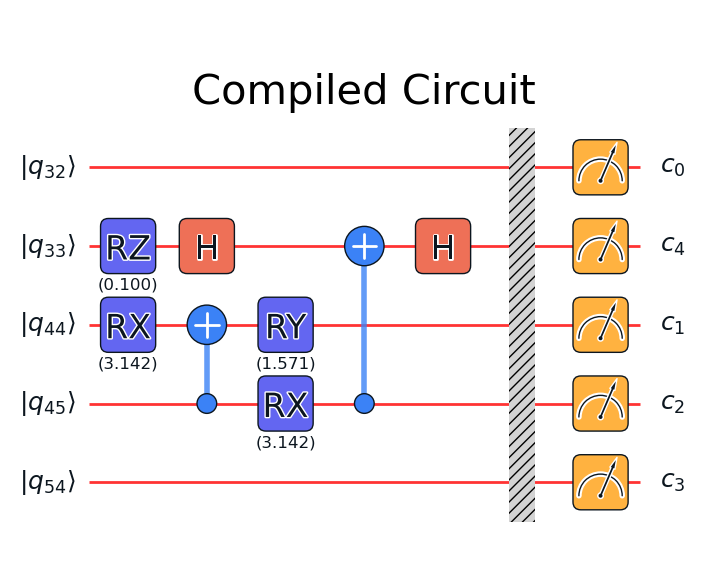

In [24]:
res.transpiled_circuit.plot_circuit("Compiled Circuit")

如果您想检查执行结果是否正确，Quafu 提供简单的电路模拟功能。

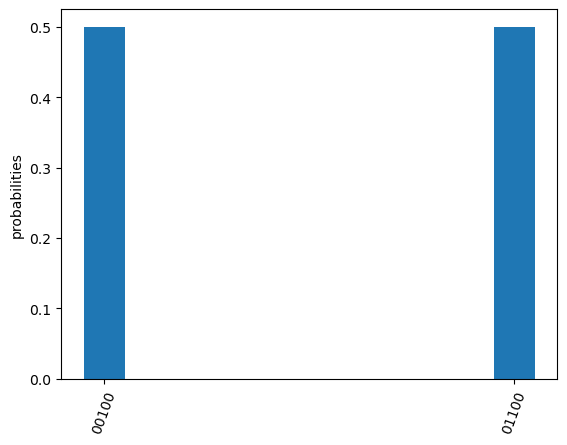

In [25]:
from quafu import simulate
simu_res = simulate(qc, output="probabilities")
simu_res.plot_probabilities()

如果您不想绘制结果中概率为0的测量基，请将方法 [`plot_probabilities`](apiref/#quafu.results.results.SimuResult.plot_probabilities) 中的参数 `full` 设置成 `False`。 请注意，这个参数仅对模拟功能返回的结果有效。

### <a id="a_subtle_detail">一些细节</a>

将计算基表示为比特串时，有两种不同的约定。例如，为了表示只有第一个量子比特被激发的状态，有些人可能写 10...000，而另一些人可能写 000...01。这种微妙的细节有时会导致计算混乱甚至严重错误。以下实验演示了 ``pyquafu`` 中使用的约定。 

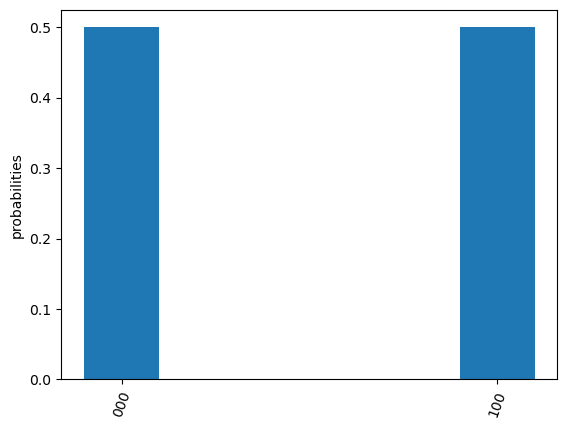

In [26]:
from quafu import QuantumCircuit, simulate

n = 3
qc = QuantumCircuit(n)  # |000>
qc.h(0)  # |100> + |000>
qc.measure()

res = simulate(qc)
res.plot_probabilities()

在这里你可以看到，在 ``pyquafu`` 中，“计数”服从所谓的“大端序”。但是，由于某些历史原因，状态向量改用"小端序"。

In [27]:
res = simulate(qc, output='state_vector')
print(res.state_vector[:2])
state_tensor = res.state_vector.reshape(tuple(n*[2])).transpose([-3, -2, -1])
print(state_tensor[0, 0, 0])
print(state_tensor[0, 0, 1])
print(state_tensor[1, 0, 0])

[0.70710678+0.j 0.70710678+0.j]
(0.7071067811865475+0j)
(0.7071067811865475+0j)
0j


如果这不是您习惯的约定，``ndarray.transpose``可能会有所帮助。

In [28]:
state_tensor = state_tensor.transpose(tuple(range(n-1, -1, -1)))

## 测量可观测量

Quafu 提供了用预设的量子线路来测量可观测量的功能。你可以将需要测量期望值的泡利算符输入到 [`submit`](apiref/#quafu.tasks.tasks.Task.submit) 方法中。例如，你可以输入 [["XYX", [0, 1, 2]], ["Z", [1]]] 来计算算符 $\sigma^x_0\sigma^y_1\sigma^x_2$ 和 $\sigma^z_1$ 的期望值。[`submit`](apiref/#quafu.tasks.tasks.Task.submit) 方法会用不同的测量基来最小化线路的执行次数，从而可以计算所有输入算符的期望值。

这里我们展示了如何测量伊辛链的能量期望值
$$H=\sum_i \sigma^z_i \sigma^z_{i+1} + g \sum_i \sigma^x_i.$$
首先，我们用三个哈达玛门初始化一个线路。

In [31]:
q = QuantumCircuit(5)

for i in range(5):
    if i % 2 == 0:
        q.h(i)

measures = list(range(5))
q.measure(measures)
q.draw_circuit()

q[0]  --H-- M->c[0]
           
q[1]  ----- M->c[1]
           
q[2]  --H-- M->c[2]
           
q[3]  ----- M->c[3]
           
q[4]  --H-- M->c[4]


接下来，我们设置需要测量的算符来计算能量期望值，并使用 [`submit`](apiref/#quafu.tasks.tasks.Task.submit) 方法提交电路。

In [32]:
test_Ising = [["X", [i]] for i in range(5)]
test_Ising.extend([["ZZ", [i, i+1]] for i in range(4)])
res, obsexp = task.submit(q, test_Ising)

Job start, need measured in  [['XXXXX', [0, 1, 2, 3, 4]], ['ZZZZZ', [0, 1, 2, 3, 4]]]


该函数返回测量结果和算符期望值。测量结果仅包含两个 `ExecResult` 对象，因为任务仅提交两次，测量基分别为 [['XXXXX', [0, 1, 2, 3, 4]] 和 ['ZZZZZ', [0, 1, 2, 3, 4]]]。

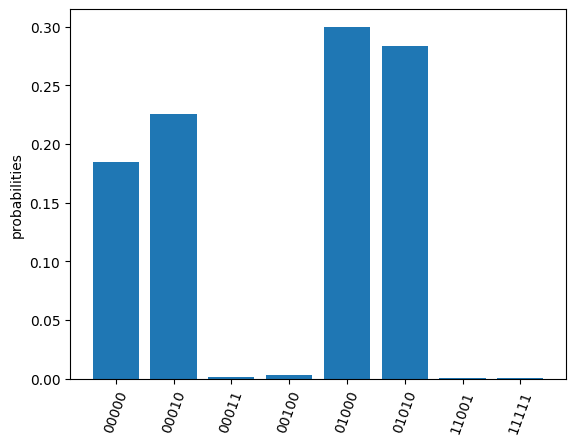

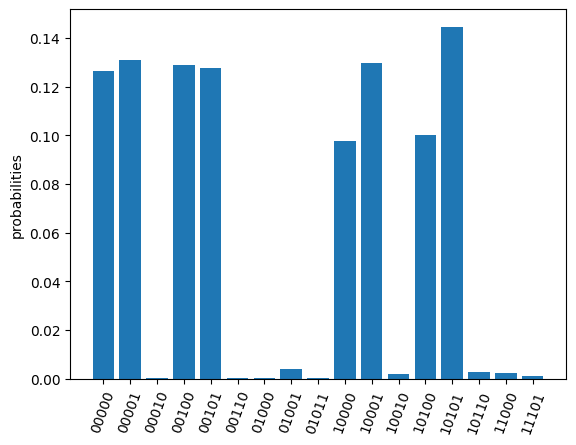

In [16]:
res[0].plot_probabilities()
res[1].plot_probabilities()

返回的算符期望值 (`obsexp`) 是一个长度等于输入算符编号的列表。我们可以用它来计算能量期望。

In [10]:
print(obsexp)
g = 0.5
E = g*sum(obsexp[:5])+sum(obsexp[5:])
print(E)

[1.0, 0.046999999999999986, 1.0, 0.03699999999999998, 0.998, 0.00899999999999995, 0.08499999999999996, 0.08299999999999996, 0.008999999999999952]
1.7269999999999999


## 异步提交任务
在上面的例子中，我们选择打开 python 内核并等待结果。您也可以在 [`send`](apiref/#quafu.tasks.tasks.Task.send) 函数中设置 `wait=False` 以异步提交任务。在这里，我们使用另一个测量量子比特退相干时间 $T_1$ 的示例来演示用法。

In [37]:
task = Task()
task.config(backend="ScQ-P18", shots=2000, compile=False, priority=2)

准备一组任务的参数并异步发送任务。

In [38]:
ts = range(0, 21, 1)
names = ["%dus" %t for t in ts]
for name, t in zip(names, ts): 
    q = QuantumCircuit(3)
    q.x(2)
    q.delay(2, t, unit="us")
    q.measure([2])
    res = task.send(q, wait=False, name=name, group="Q3_T1")

这里的 `delay` 选项会让目标量子比特 `2` 空闲一段时间 `t` 而不执行任何操作，其时间单位为 `us`（微秒）。在 `send` 函数中，我们设置 `wait` 为 `False` 来异步执行任务，用持续时间给每个任务命名，并将所有任务设置为一个名为 "Q3_T1" 的组。

现在我们可以尝试使用 [`retrieve_group`](apiref/#quafu.tasks.tasks.Task.retrieve_group) 方法检索任务组。

In [61]:
group_res = task.retrieve_group("Q3_T1")
probs = [res.probabilities["1"] for res in group_res]

Group:  Q3_T1
task_id              task_name      status    
326564501AF5CF47     0us            Completed 
32656450226701BD     1us            Completed 
326564502A80CC5D     2us            Completed 
3265645032D98C32     3us            Completed 
326564503AEFE7EA     4us            Completed 
326564600CFE2817     5us            Completed 
3265646014FFEA5F     6us            Completed 
326564601C2E9597     7us            Completed 
32656460240A93E6     8us            Completed 
326564602C15CFFB     9us            Completed 
3265646033EEBD20     10us           Running   
326564603B1A478D     11us           In Queue  
3265647006C96D3D     12us           In Queue  
326564700F71B85A     13us           In Queue  
32656470204A3472     14us           In Queue  
32656470384DCD98     15us           In Queue  
3265648004FB6BCF     16us           In Queue  
326564800DA63F54     17us           In Queue  
3265648022DAC675     18us           In Queue  
3265648036F7EA24     19us           In Queue  

完成所有任务后，我们可以执行下一步来获得 $T_1$。

In [67]:
group_res = task.retrieve_group("Q3_T1")
probs = [res.probabilities["1"] for res in group_res]

Group:  Q3_T1
task_id              task_name      status    
326564501AF5CF47     0us            Completed 
32656450226701BD     1us            Completed 
326564502A80CC5D     2us            Completed 
3265645032D98C32     3us            Completed 
326564503AEFE7EA     4us            Completed 
326564600CFE2817     5us            Completed 
3265646014FFEA5F     6us            Completed 
326564601C2E9597     7us            Completed 
32656460240A93E6     8us            Completed 
326564602C15CFFB     9us            Completed 
3265646033EEBD20     10us           Completed 
326564603B1A478D     11us           Completed 
3265647006C96D3D     12us           Completed 
326564700F71B85A     13us           Completed 
32656470204A3472     14us           Completed 
32656470384DCD98     15us           Completed 
3265648004FB6BCF     16us           Completed 
326564800DA63F54     17us           Completed 
3265648022DAC675     18us           Completed 
3265648036F7EA24     19us           Completed 

Text(16, 0.9, '$T_1=24.18 \\mu s$')

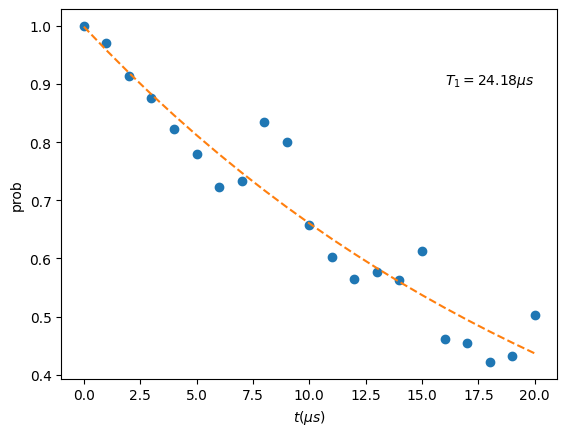

In [68]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*np.exp(-b*x)

paras, pconv = curve_fit(func, ts, probs)
plt.plot(ts, probs, "o")
plt.plot(ts, func(ts, *paras), "--")
plt.xlabel("$t (\mu s)$")
plt.ylabel("prob")
plt.text(16, 0.9, r"$T_1=%.2f \mu s$" %(1/paras[1]))

请注意，``group_name`` 和提交历史只有在 ``python`` 内核运行时才会保存在 `task` 对象中。为了数据持久化，我们提供了 ``TaskDatabase`` ，它使用 ``qslite3`` 作为后端。它可以帮助你将任务信息保存到你的本地计算机。

我们不会过多地开发 ``TaskDatabase`` ，因为未来的 web 后端会提供更强大和方便的用法。但是，如果你对用 ``qslite3`` 自由地操作数据库感兴趣，我们也提供了 [教程](https://github.com/ScQ-Cloud/quafu-tutorial/tree/main/python_skill) 来快速入门。

In [69]:
from quafu.tasks.task_database import QuafuTaskDatabase, print_task_info

with QuafuTaskDatabase() as db:
    for res in group_res:
        db.insert_task(res.taskid, res.task_status, group_name="Q3_T1", task_name=res.taskname, priority=2)
    print('Tasks info stored')
    print("Task list:")
    for task_info in db.find_all_tasks():
        print_task_info(task_info) 
        break  # 这是为了避免演示时间过长，您可以取消此行以查看整个信息

Tasks info stored
Task list:
Task ID: 326564501AF5CF47
Group Name: Q3_T1
Task Name: 0us
Status: Completed
Priority: 2
Send Time: None
Finish Time: None
------------------------


最后，您还可以使用其唯一的 `task_id` 检索单个任务，并在 [Quafu](http://quafu.baqis.ac.cn/) 网页中下载所有历史任务。

In [70]:
res_20us = task.retrieve("1663B8403AE76050")
print(res_20us.probabilities)

{'0': 0.662, '1': 0.338}
